In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\AbhilashKY\workoopolis\Gold loan\gl.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Checking null values

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in the dataset we shall fill the null values

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [26]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [30]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All null values are filled

## Checking duplicate values

In [34]:
df.duplicated().sum()

0

In [36]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


Gender
Male      502
Female    112
Name: count, dtype: int64


Married
Yes    401
No     213
Name: count, dtype: int64


Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     532
Yes     82
Name: count, dtype: int64


ApplicantIncome
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 505, dtype: int64


CoapplicantIncome
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000   

## Statistical Summary

In [46]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [48]:
#Data distribution of target variable
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [50]:
#checking no of unique values in each column
df.nunique().to_frame("No of unique values")

,No of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,10


In [83]:
cat = []
num = []
for i in df.columns:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)

In [85]:
print('Categorical columns', cat)
print('Numerical columns', num)

Categorical columns ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical columns ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


### Data Visualisatioin

#### Univariate Analysis

number of people who take loan as group by gender:
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

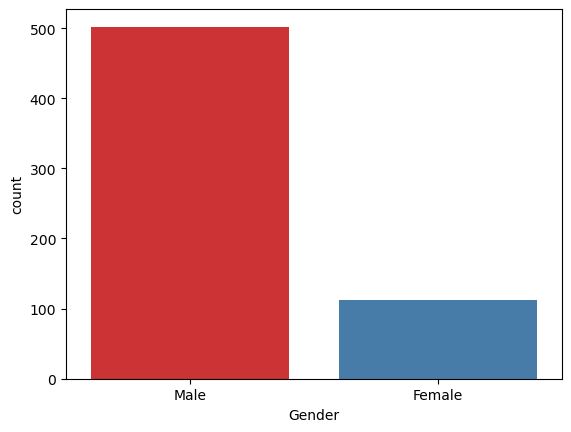

In [55]:
print("number of people who take loan as group by gender:")
print(df["Gender"].value_counts())
sns.countplot(data=df, x="Gender", palette="Set1")

number of people who take loan as group by Married:
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

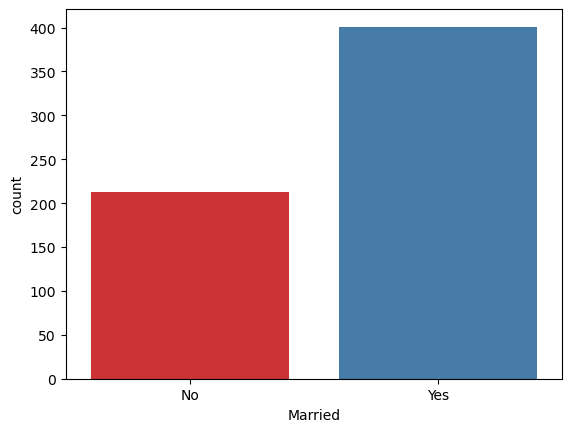

In [57]:
print("number of people who take loan as group by Married:")
print(df["Married"].value_counts())
sns.countplot(data=df, x="Married", palette="Set1")

number of people who take loan as group by Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

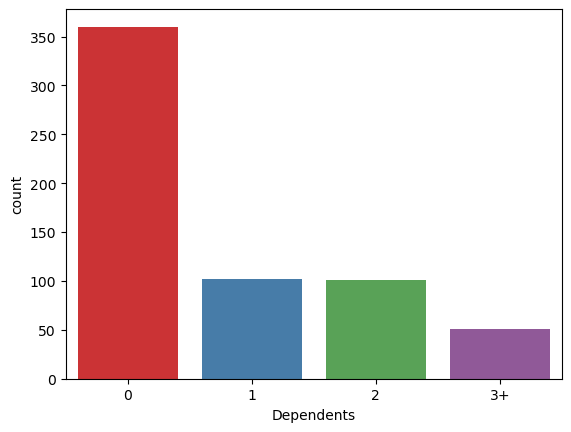

In [61]:
print("number of people who take loan as group by Dependents:")
print(df["Dependents"].value_counts())
sns.countplot(data=df, x="Dependents",palette="Set1")

number of people who take loan as group by Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

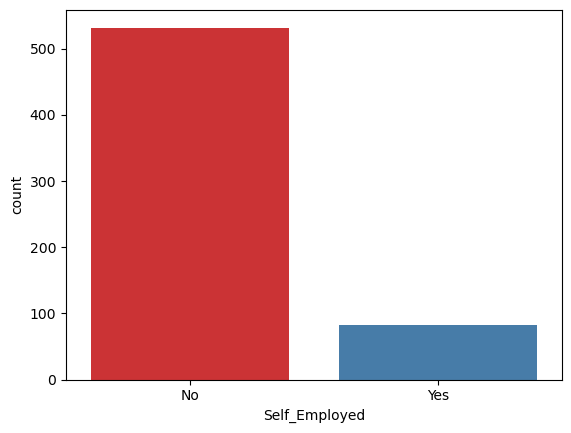

In [65]:
print("number of people who take loan as group by Self_Employed:")
print(df["Self_Employed"].value_counts())
sns.countplot(data=df, x="Self_Employed", palette="Set1")

number of people who take loan as group by LoanAmountterm in days:
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

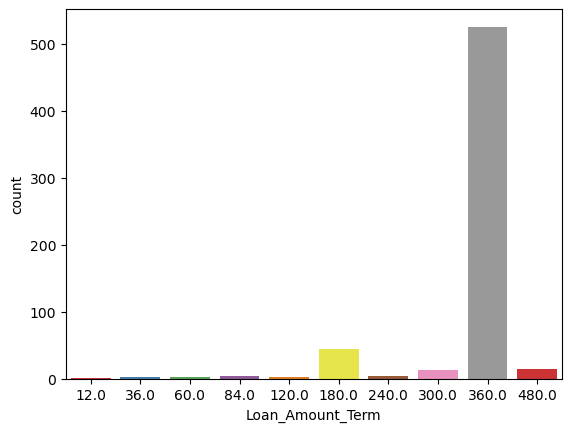

In [91]:
print("number of people who take loan as group by LoanAmountterm in days:")
print(df["Loan_Amount_Term"].value_counts())
sns.countplot(data=df, x="Loan_Amount_Term", palette="Set1")

number of people who take loan as group by Credit_history:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

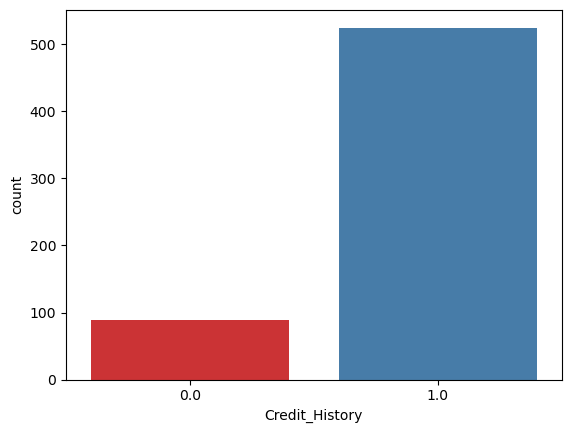

In [69]:
print("number of people who take loan as group by Credit_history:")
print(df["Credit_History"].value_counts())
sns.countplot(data=df, x="Credit_History", palette="Set1")

In [71]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


### Bivariate Analysis

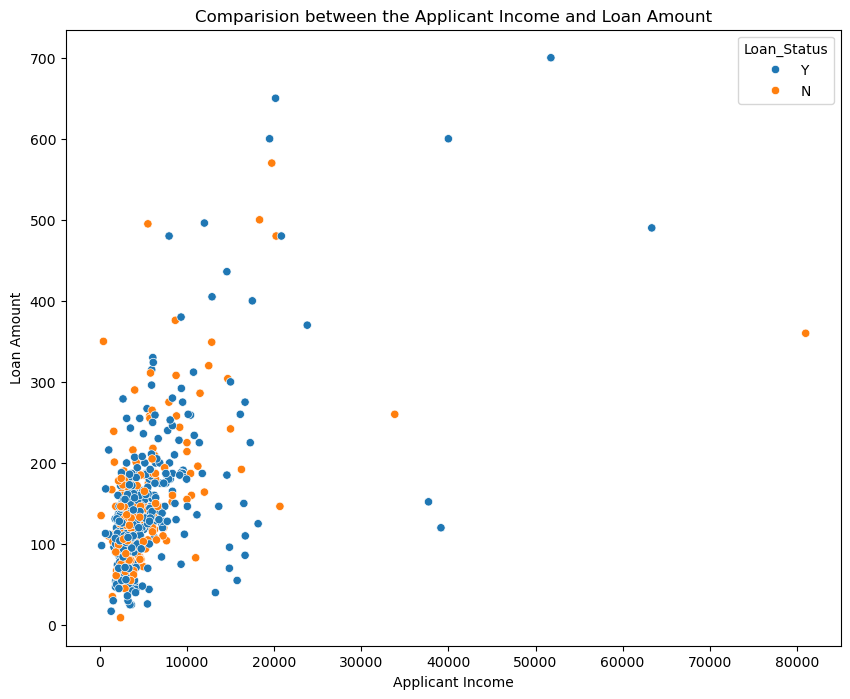

In [100]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = 'ApplicantIncome',y = 'LoanAmount', hue= 'Loan_Status',data = df)
plt.title('Comparision between the Applicant Income and Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

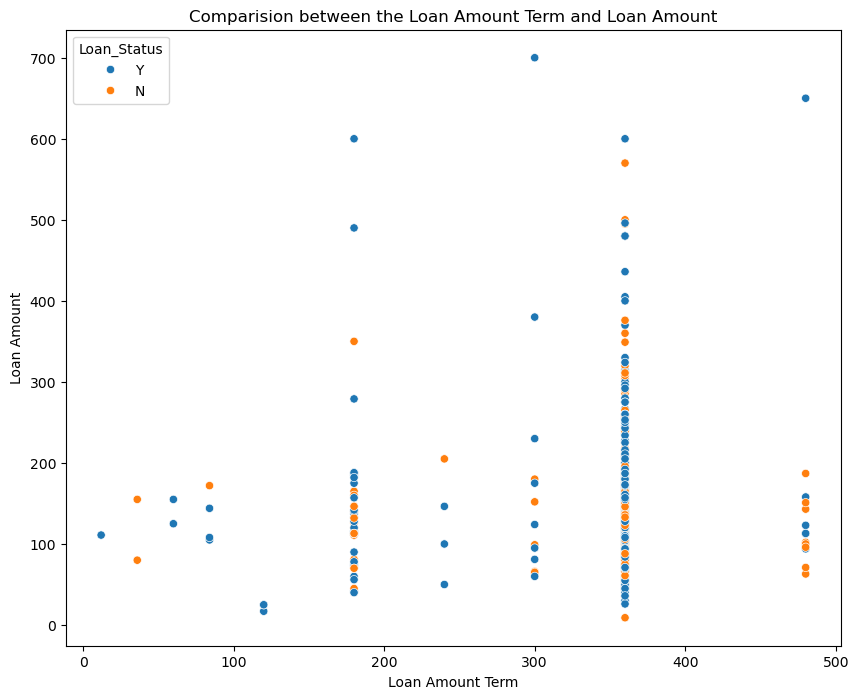

In [102]:
plt.figure(figsize =(10,8))
sns.scatterplot(x = 'Loan_Amount_Term',y = 'LoanAmount', hue= 'Loan_Status',data = df)
plt.title('Comparision between the Loan Amount Term and Loan Amount')
plt.xlabel('Loan Amount Term')
plt.ylabel('Loan Amount')
plt.show()

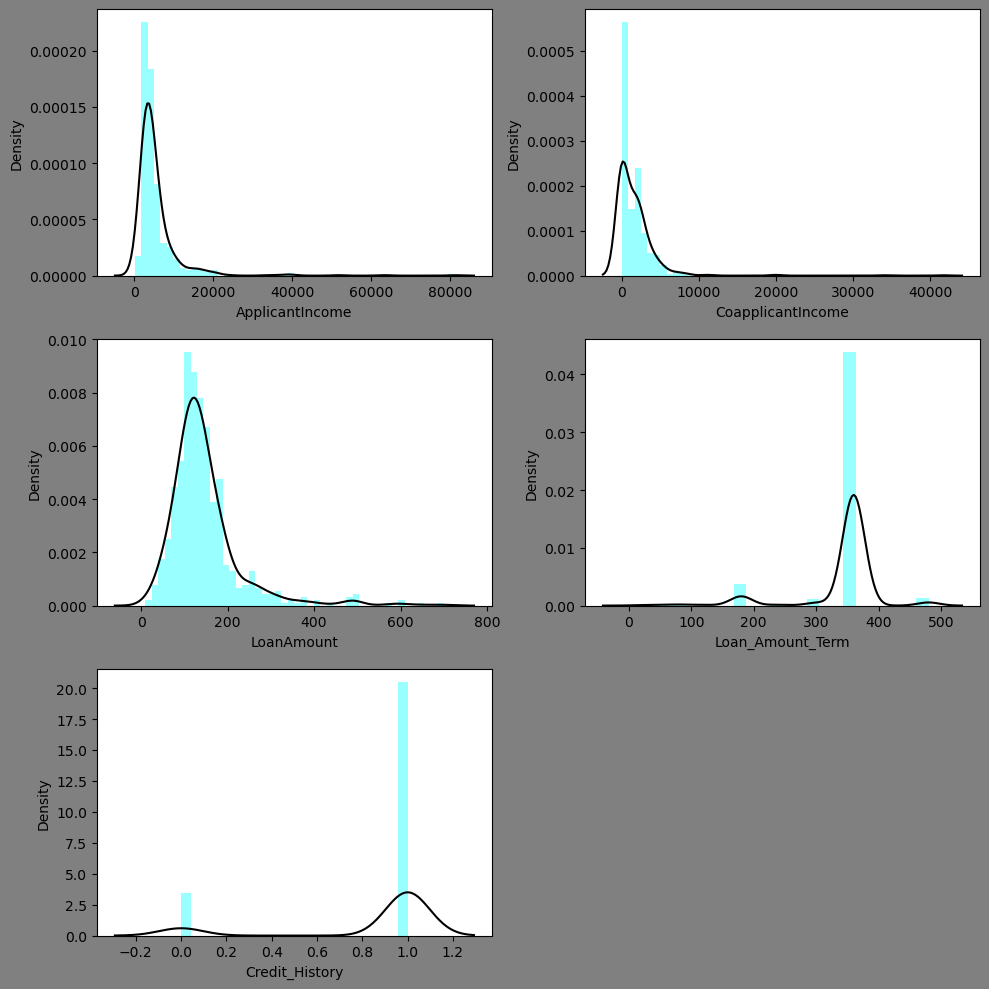

In [106]:
plt.figure(figsize = (10,10), facecolor = 'grey')
count = 1
for i in num:
    if count<6:
        ax = plt.subplot(3,2, count)
        sns.distplot(df[i], color = 'cyan', kde = True,kde_kws = {'color':'black'})
        plt.xlabel(i, fontsize = 10)
    count+=1
plt.tight_layout()

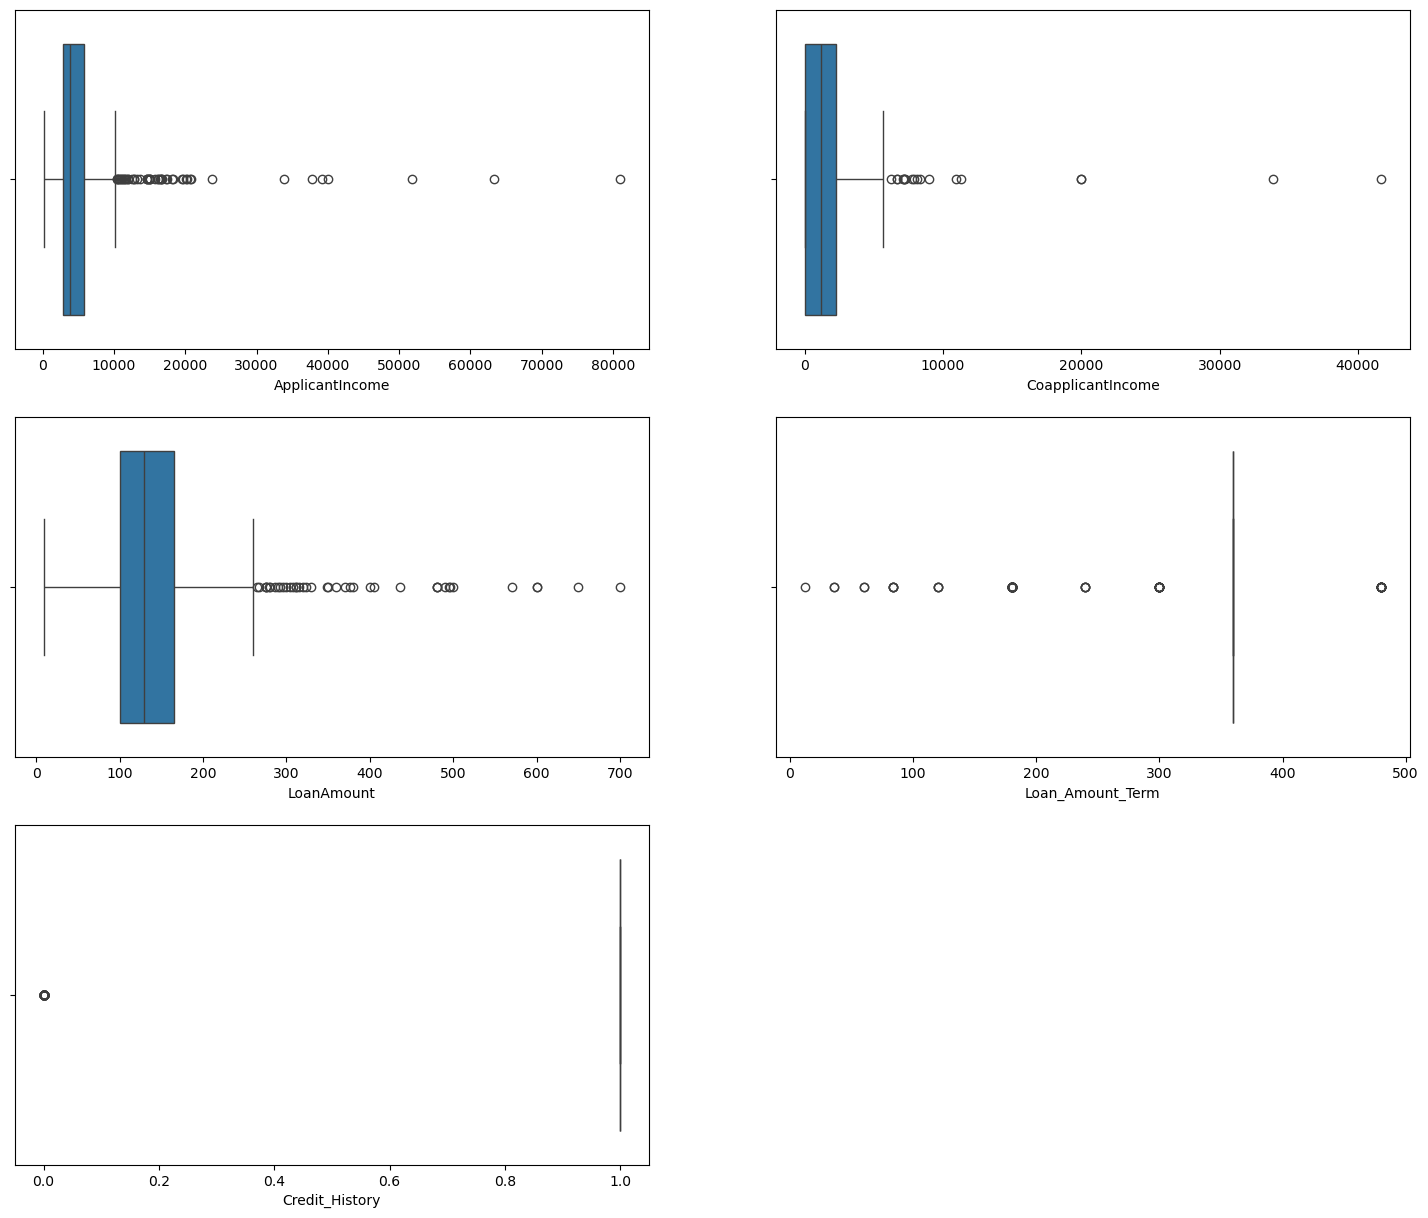

In [117]:
plt.figure(figsize = (18,15))
c = 1
for i in num:
    if c<6:
        ax = plt.subplot(3,2,c)
        sns.boxplot(x = df[i], data = df)
        plt.xlabel(i)
    c+=1
plt.show()

In [133]:
# 1st quantile
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
Q1 = features.quantile(0.25)
# 3rd quantile
Q3 = features.quantile(0.75)
# IQR
IQR = Q3-Q1

df1=df[~((df<(Q1-1.5*IQR))|(df>(Q3 + 1.5*IQR))).any(axis=1)]

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [135]:
import pandas as pd

# Define features
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

# Calculate the 1st quantile (25th percentile)
Q1 = features.quantile(0.25)

# Calculate the 3rd quantile (75th percentile)
Q3 = features.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Filter out outliers
# Create a boolean mask for outliers
outlier_mask = ~((features < (Q1 - 1.5 * IQR)) | (features > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply the mask to the DataFrame
df1 = df[outlier_mask]


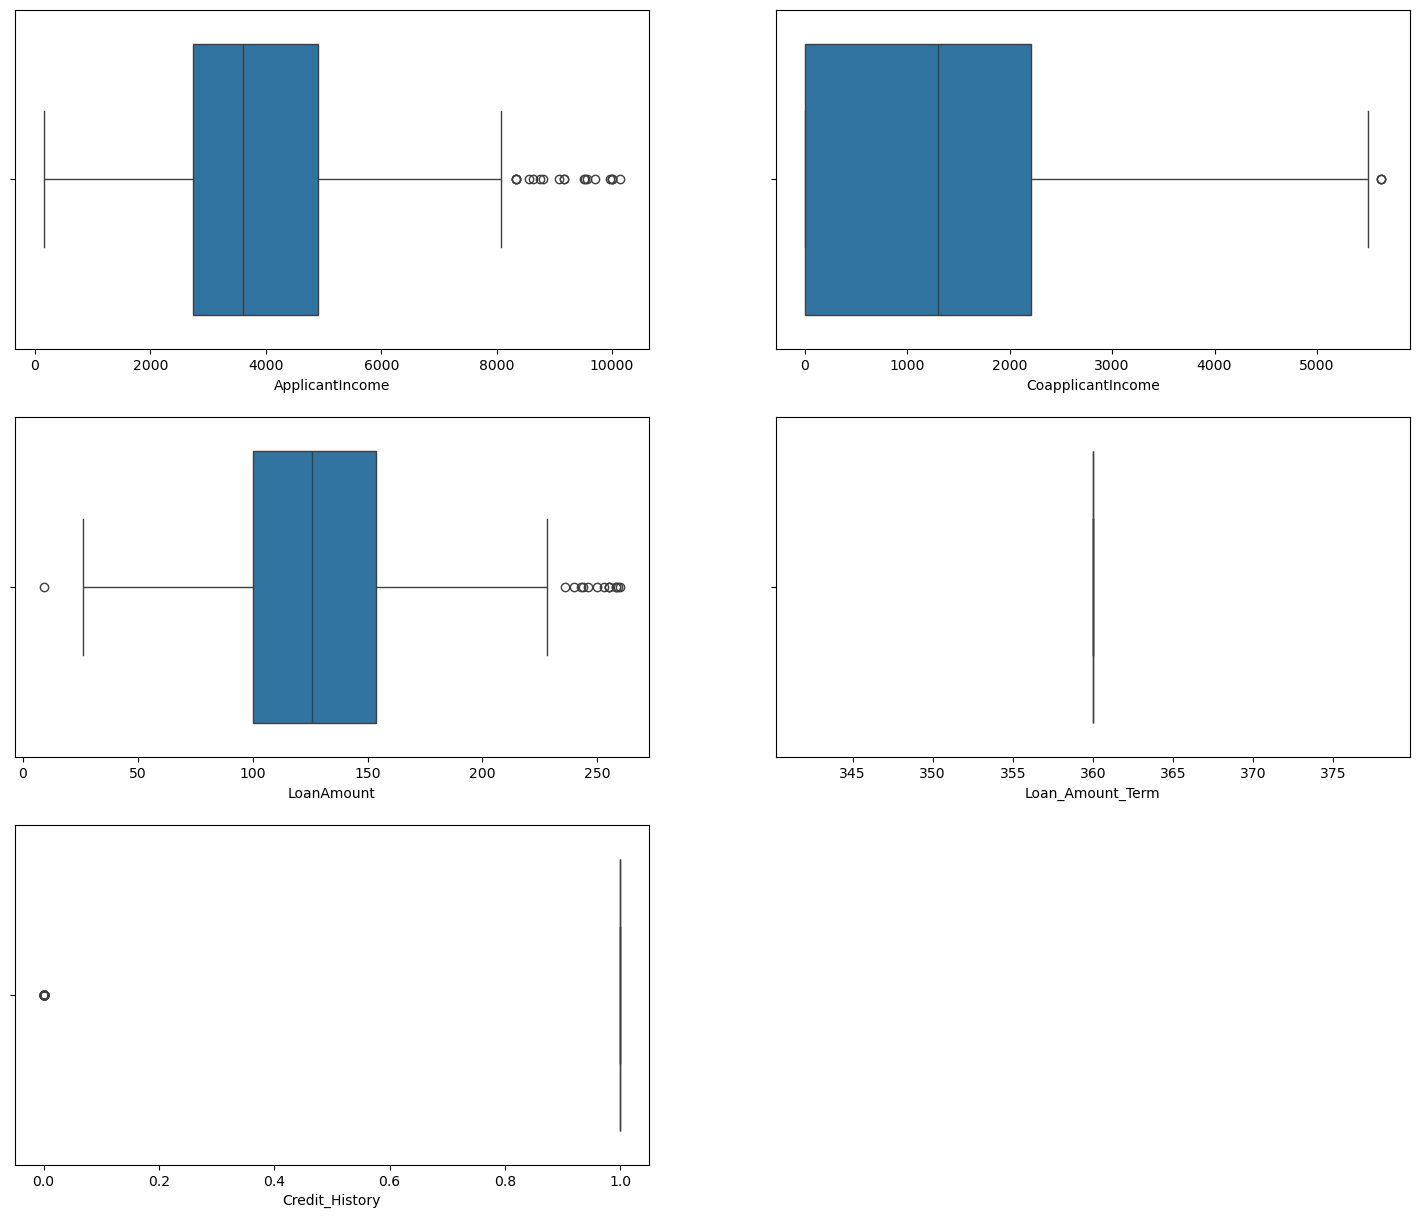

In [137]:
plt.figure(figsize = (18,15))
c = 1
for i in num:
    if c<6:
        ax = plt.subplot(3,2,c)
        sns.boxplot(x = df1[i], data = df1)
        plt.xlabel(i)
    c+=1
plt.show()

In [139]:
print(df.shape[0])
df1.shape[0]

614


459

In [141]:
df = df1

In [147]:
from sklearn.preprocessing import LabelEncoder

In [149]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [153]:

# Create an instance of LabelEncoder
le = LabelEncoder()

# List of columns to encode
categorical_columns = ['Education', 'Self_Employed', 'Gender', 'Married', 'Property_Area', 'Loan_Status']

# Apply LabelEncoder to each column individually
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Display the value counts for each encoded column
df[categorical_columns].apply(pd.Series.value_counts)


,Education,Self_Employed,Gender,Married,Property_Area,Loan_Status
0,354.0,408.0,90.0,164.0,144,133.0
1,105.0,51.0,369.0,295.0,178,326.0
2,NaN,NaN,NaN,NaN,137,NaN


In [173]:
df['Dependents'] = le.fit_transform(df['Dependents'])

In [155]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [157]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [161]:
df.drop(columns = ['Loan_ID', inplace = True)

In [179]:
df.drop(columns = 'Dependents', inplace = True)

In [181]:
#Feature Selection
X = df.drop('Loan_Status', axis =1)
y = df['Loan_Status']
print(X.shape)
print(y.shape)

(459, 10)
(459,)


In [197]:

from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(X,y)

In [201]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(100,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred = rf.predict(x_test)
    accu = accuracy_score(y_test, pred)
    if accu>maxAccu:
        maxAccu = accu
        maxRs =i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.8775510204081632 at random_state 107


In [205]:
#Creating train test split at maxRs
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [207]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import  cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [209]:
def metric_score(clf,x_train,x_test,y_train,y_test, train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n--Train Result--')
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100 :.2f}%")
    elif train == False:
        pred = clf.predict(x_test)
        print('\n--Test result--')
        print(f"Accuracy Score:{accuracy_score(y_test, pred)*100 :.2f}%")
        
        print('\n \n Classification Report\n', classification_report(y_test,pred, digits = 2))
        
        print('\n ******Cross Validation******\n')
        score = cross_val_score(clf,x,y)
        print("Scores:", score)
        print("Mean of scores:", score.mean())
        print("Difference between Accuracy Score and cross validation score is - ",abs(accuracy_score(y_test, pred)-score.mean()))

#### 1.Logistic Regresion

In [212]:
ls = LogisticRegression()
ls.fit(x_train,y_train)
#Call the function and pass the dataset to check train and test result
metric_score(ls,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(ls,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:78.29%

--Test result--
Accuracy Score:79.08%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.82      0.70      0.75        90
           1       0.77      0.87      0.82       106

    accuracy                           0.79       196
   macro avg       0.80      0.78      0.79       196
weighted avg       0.79      0.79      0.79       196


 ******Cross Validation******

Scores: [0.66412214 0.74045802 0.78461538 0.79230769 0.85384615]
Mean of scores: 0.7670698766881973
Difference between Accuracy Score and cross validation score is -  0.02374644984241503


#### 2. Support Vector Machine Cclassifier

In [215]:
svc = SVC()
svc.fit(x_train,y_train)
#Call the function and pass the dataset to check train and test result
metric_score(svc,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(svc,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:53.95%

--Test result--
Accuracy Score:54.59%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.51      0.53      0.52        90
           1       0.58      0.56      0.57       106

    accuracy                           0.55       196
   macro avg       0.54      0.54      0.54       196
weighted avg       0.55      0.55      0.55       196


 ******Cross Validation******

Scores: [0.5648855  0.55725191 0.59230769 0.51538462 0.55384615]
Mean of scores: 0.5567351732237229
Difference between Accuracy Score and cross validation score is -  0.01081680587678413


#### 3.KNN Classifier

In [218]:
#Instantiate KNNClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
#Call the function and pass the dataset to check train and test result
metric_score(knn,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(knn,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:76.54%

--Test result--
Accuracy Score:57.65%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.53      0.66      0.59        90
           1       0.64      0.51      0.57       106

    accuracy                           0.58       196
   macro avg       0.58      0.58      0.58       196
weighted avg       0.59      0.58      0.58       196


 ******Cross Validation******

Scores: [0.6259542  0.60305344 0.65384615 0.62307692 0.66923077]
Mean of scores: 0.6350322959483264
Difference between Accuracy Score and cross validation score is -  0.05850168370342845


#### 4. RandomForest Classifier

In [221]:
rs = RandomForestClassifier()
rs.fit(x_train,y_train)

metric_score(rs,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(rs,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:100.00%

--Test result--
Accuracy Score:88.78%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.94      0.81      0.87        90
           1       0.86      0.95      0.90       106

    accuracy                           0.89       196
   macro avg       0.90      0.88      0.89       196
weighted avg       0.89      0.89      0.89       196


 ******Cross Validation******

Scores: [0.73282443 0.77862595 0.85384615 0.85384615 0.89230769]
Mean of scores: 0.822290076335878
Difference between Accuracy Score and cross validation score is -  0.06546502570493828


#### 5. Gradient Classifier

In [224]:
gd = GradientBoostingClassifier()
gd.fit(x_train,y_train)
metric_score(gd,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(gd,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:95.61%

--Test result--
Accuracy Score:85.20%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.77      0.83        90
           1       0.82      0.92      0.87       106

    accuracy                           0.85       196
   macro avg       0.86      0.85      0.85       196
weighted avg       0.86      0.85      0.85       196


 ******Cross Validation******

Scores: [0.71755725 0.76335878 0.85384615 0.83846154 0.86153846]
Mean of scores: 0.8069524368761011
Difference between Accuracy Score and cross validation score is -  0.04508837945042954


#### 6. AdaBoost Classifier

In [227]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
metric_score(ad,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(ad,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:86.40%

--Test result--
Accuracy Score:84.69%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.93      0.72      0.81        90
           1       0.80      0.95      0.87       106

    accuracy                           0.85       196
   macro avg       0.87      0.84      0.84       196
weighted avg       0.86      0.85      0.84       196


 ******Cross Validation******

Scores: [0.7480916  0.78625954 0.81538462 0.84615385 0.84615385]
Mean of scores: 0.8084086905460952
Difference between Accuracy Score and cross validation score is -  0.038530084964108924


#### 7.Bagging Classifier

In [230]:
bg = BaggingClassifier()
bg.fit(x_train,y_train)
metric_score(bg,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(bg,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:99.12%

--Test result--
Accuracy Score:84.18%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        90
           1       0.90      0.79      0.84       106

    accuracy                           0.84       196
   macro avg       0.84      0.85      0.84       196
weighted avg       0.85      0.84      0.84       196


 ******Cross Validation******

Scores: [0.75572519 0.80152672 0.85384615 0.81538462 0.79230769]
Mean of scores: 0.8037580739870815
Difference between Accuracy Score and cross validation score is -  0.038078660706796


#### 8. Extratrees Classifier

In [233]:
ex = ExtraTreesClassifier()
ex.fit(x_train,y_train)
metric_score(ex,x_train,x_test,y_train,y_test, train = True) # This is training score
metric_score(ex,x_train,x_test,y_train,y_test, train = False) # This is testing score


--Train Result--
Accuracy Score:100.00%

--Test result--
Accuracy Score:82.65%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        90
           1       0.83      0.85      0.84       106

    accuracy                           0.83       196
   macro avg       0.83      0.82      0.83       196
weighted avg       0.83      0.83      0.83       196


 ******Cross Validation******

Scores: [0.76335878 0.7480916  0.82307692 0.83076923 0.83846154]
Mean of scores: 0.8007516147974163
Difference between Accuracy Score and cross validation score is -  0.02577899744748169


### Cross Validation
By evaluating the cross validation scores for all the classification algorithm we conclude that Random Forest Classifier is the best algorithm since the differnece between accuracy score and validation score is least

#### Hyper Parameter Tuning

In [238]:
from sklearn.model_selection import RandomizedSearchCV as rcv

In [240]:
param = {
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':range(5,15),
    'n_estimators' :range(1,5),
    'max_depth':range(10,20),
    'min_samples_split':range(10,15)
    
}

In [242]:
rn_search = rcv(RandomForestClassifier(), cv = 5,param_distributions = param)

In [244]:
rn_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(10, 20),
                                        'min_samples_leaf': range(5, 15),
                                        'min_samples_split': range(10, 15),
                                        'n_estimators': range(1, 5)})

In [246]:
rn_clf = rn_search.best_estimator_

In [248]:
rn_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=19, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=4)

In [250]:
metric_score(rn_clf,x_train,x_test,y_train,y_test, train = True) # For training result

metric_score(rn_clf,x_train,x_test,y_train,y_test, train = False) # For testing result


--Train Result--
Accuracy Score:84.43%

--Test result--
Accuracy Score:80.61%

 
 Classification Report
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        90
           1       0.80      0.86      0.83       106

    accuracy                           0.81       196
   macro avg       0.81      0.80      0.80       196
weighted avg       0.81      0.81      0.81       196


 ******Cross Validation******

Scores: [0.73282443 0.71755725 0.77692308 0.83076923 0.86923077]
Mean of scores: 0.785460951262478
Difference between Accuracy Score and cross validation score is -  0.020661497717113897


In [254]:
from sklearn.metrics import RocCurveDisplay

In [258]:
#All the models score Captured
ls.score(x_test,y_test)
ad.score(x_test,y_test)
knn.score(x_test,y_test)
rs.score(x_test,y_test)
gd.score(x_test,y_test)
bg.score(x_test,y_test)
ex.score(x_test,y_test)
print('All the models score captured')

All the models score captured


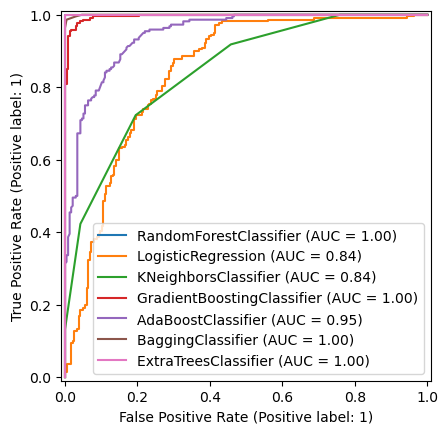

In [262]:
#Plotting the roc_curve for all the models. Here we are capturing each model's confusion matrix data. disp.ax_ is nothing but plotting the curve comparing to decisiontreeclassifier decision tree confusion matrix an

disp = RocCurveDisplay.from_estimator(rs,x_train,y_train)
RocCurveDisplay.from_estimator(ls,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(knn,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(gd,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(ad,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(bg,x_train,y_train,ax = disp.ax_)

RocCurveDisplay.from_estimator(ex,x_train,y_train,ax = disp.ax_)

plt.legend(prop={'size':10},loc = 'lower right')

plt.show()

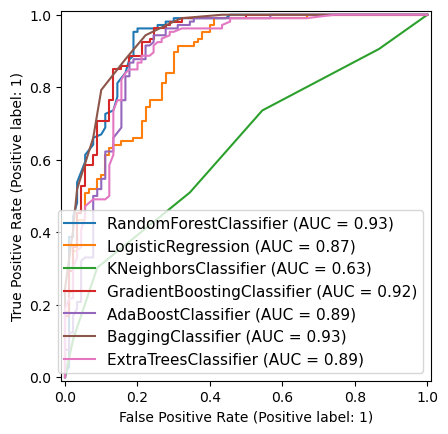

In [266]:
disp = RocCurveDisplay.from_estimator(rs,x_test,y_test)
RocCurveDisplay.from_estimator(ls,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(knn,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(gd,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(ad,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(bg,x_test,y_test,ax = disp.ax_)

RocCurveDisplay.from_estimator(ex,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':11},loc = 'lower right')

plt.show()

In [268]:
#Saving the model
import joblib
joblib.dump(rn_clf,"Gold_loan.joblib")

['Gold_loan.joblib']

In [270]:
#predicting the saved model
model = joblib.load("Gold_loan.joblib")

#prediction
prediction = model.predict(x_test)
prediction

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [272]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a
data

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
191,0,0
192,0,0
193,1,1
194,0,0


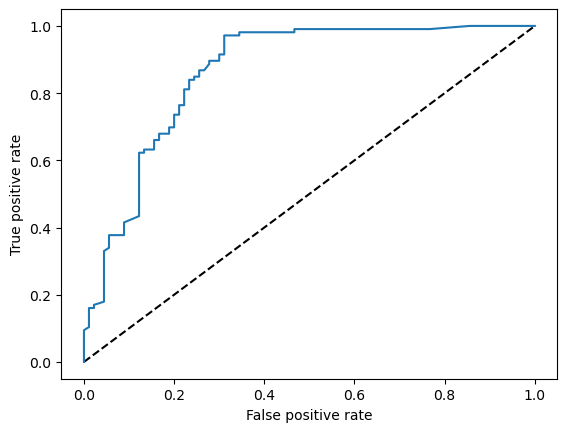

Auc score: 
 0.8014675052410902


In [274]:
from sklearn.metrics import auc, roc_auc_score,roc_curve
y_pred_prob = rn_clf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'Random Classifier(area=%0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test,rn_clf.predict(x_test))
print('Auc score:','\n', auc_score)

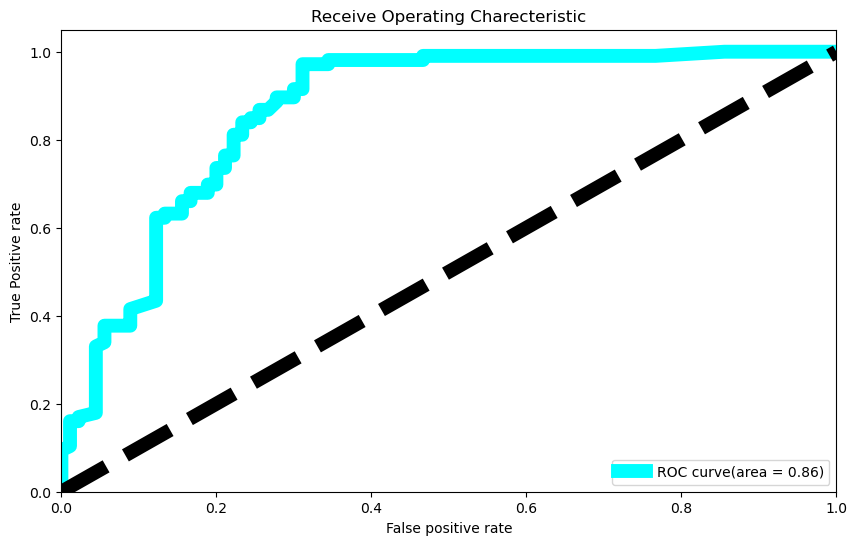

In [276]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)

plt.figure(figsize = (10,6))
plt.plot(fpr,tpr, color = 'cyan', lw = 10, label = 'ROC curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color = 'black',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive rate")
plt.ylabel("True Positive rate")
plt.title("Receive Operating Charecteristic")
plt.legend(loc = "lower right")
plt.show()